# Lecture 6 - DImensionality Reduction with PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.tail(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

## Preprocessing of data

In [5]:
data_array = np.array(data)

In [6]:
X = data_array[:,1:].T
# Y = data_array[:,0][:, np.newaxis].T
Y = data_array[:,0].T

print("d x N: ", X.shape)

d x N:  (784, 42000)


### Visualizing the digit

In [7]:
[1]
[2]
[3]

[3]

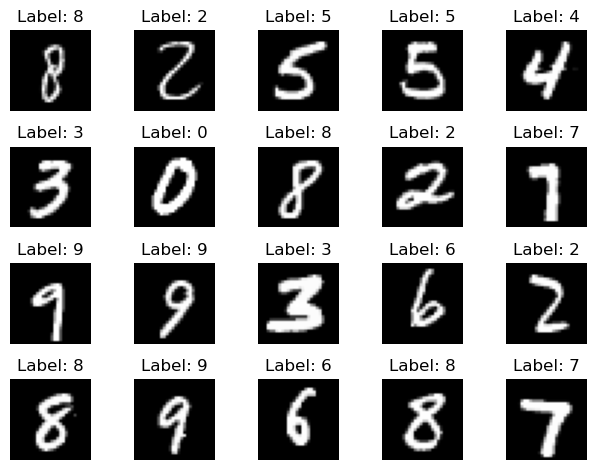

In [8]:
nrows = 4
ncols = 5

fig, axs = plt.subplots(nrows, ncols)

for i in range(0, nrows):
    for j in range(0, ncols):
        idx = np.random.randint(0, X.shape[1])
        img = X[:, idx][:, np.newaxis].reshape((28, 28))
        
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f"Label: {Y[idx]}")

plt.tight_layout()
plt.show()

### Splitting the dataset

In [33]:
def train_test_split(X, Y, N_train):
    idx = np.arange(0, X.shape[1])
    np.random.shuffle(idx)

    train_idx = idx[:N_train] 

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    X_test = X[:, ~train_idx] 
    Y_test = Y[~train_idx]

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, int(0.8 * X.shape[1]))

In [34]:
# return X of shape (d,1)
def centroid(X):
    # return np.mean(X, axis=1, keepdims=True)
    return np.mean(X, axis=1)[:, np.newaxis]
    # np.expand_dims() is the same of [:, np.newaxis]

CX = centroid(X_train)
Xc = X_train - CX

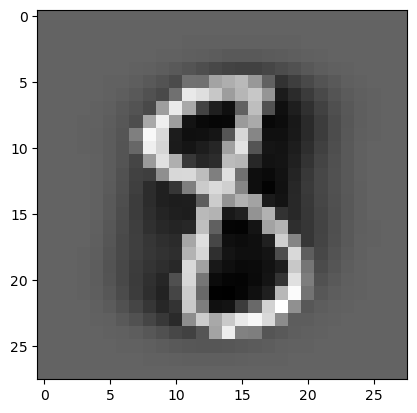

In [35]:
plt.imshow(Xc[:, 3].reshape((28,28)), cmap='gray')
plt.show()

In [36]:
print(f"Centroid of Xc is: {np.linalg.norm(centroid(Xc))}")

Centroid of Xc is: 2.8905271115330777e-12


In [37]:
U, s, VT = np.linalg.svd(Xc, full_matrices=False)
print(f"U shape: {U.shape}, S shape: {s.shape}, VT shape: {VT.shape}")

U shape: (784, 784), S shape: (784,), VT shape: (784, 33600)


In [38]:
k = 2
Z_train = U[:, :k].T @ Xc
# X_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]

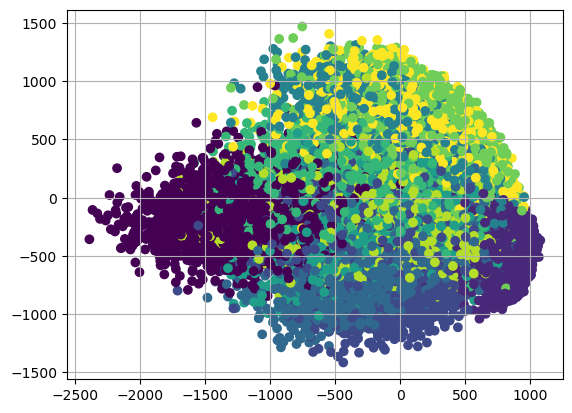

In [39]:
plt.scatter(Z_train[0,:], Z_train[1,:], c=Y_train)
plt.grid()
plt.show()

## Test

visualize the points of test projected

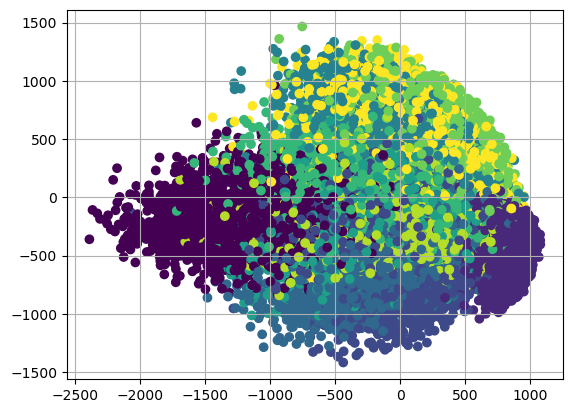

In [40]:
X_test_c = X_test - centroid(X_test)

Z_test = U[:, :k].T @ X_test_c
plt.scatter(Z_test[0,:], Z_test[1,:], c=Y_test)
plt.grid()
plt.show()